# Gliederung
1. [Setup](#setup)
    1. [Librarys](#librarys)
2. [Informationen](#informationen)
3. [Einleitung](#einleitung)
    1. [Fragestellung](#fragestellung)
    2. [Erwartung A Luca Di Palma](#erwartung_a)
    3. [Erwartung B Patrick Langkau](#erwartung_b)
4. [Imports](#imports)

<a id='setup'></a>
# 1. Setup

<a id='librarys'></a>
### 1.A. Librarys:
Sie müssen die folgenden Kommandos ausführen, um die für dieses Programm benötigten Librarys zu installieren
#### pip install matplotlib
#### pip install numpy
#### pip install pandas
#### pip install seaborn
#### pip install keras
#### pip install sklearn
#### pip install tensorflow
#### pip install plotly

<a id='informationen'></a>
# 2. Informationen
Die Aufteilung in diesem Dokument wurde so vorgenommen, dass Luca Di Palma den Vergleich der Daten mit der Mobilen Internet Geschwindigkeit übernommen hat und Patrick Langkau den Vergleich mit der Breitband Geschwindigkeit. In jedem Abschnitt wird der Author explizit genannt

Der Code muss, um korrekt zu funktionieren, komplett ausgeführt werden. Eine Einzelausführung mancher Zellen kann unerwünschte Ergebnisse hervorbringen.

Bitte lassen Sie keine Diagramme aus dem output Ordner geöffnet wenn Sie den Code ausführen, dies kann zu Fehlern führen.

Alle erstellten Diagramme sind auch im Ordner ../output/ zu finden

<a id='einleitung'></a>
# 3. Einleitung
<a id='fragestellung'></a>
### 3.A. Fragestellung
Wie hängen die einzelnen Faktoren mit der Internetgeschwindigkeit zusammen?
Kann die Internetgeschwindigkeit anhand der Faktoren eingeschätzt werden?

<a id='erwartung_a'></a>
### 3.B. Erwartung A (Luca Di Palma)
###### - Es wird vermutet, dass die Internetgeschwindigkeit abhängig von verschiedenen Faktoren wie z.B. der wirtschaftlichen Lage, dem Wohlbefinden der Bürger, oder dem Zugang zum Internet ist.
###### - Ein höherer Happines Score lässt eine schnellere Internetverbindung Vermuten
###### - Je höher die Militäraugaben, desto höher ist vermutlich auch die Internetgeschwindigkeit
<a id='erwartung_b'></a>
### 3.C. Erwartungen B (Patrick Langkau)
###### - Eine Bessere wirtschaftliche Lage eines Landes, lässt eine höhere Internetgeschwindigkeit erwarten.
###### - Wo ein höherer Prozentsatz der Menschen Zugriff auf das Internet hat, wird auch eine höhere Internetgeschwindigkeit erwartet.
###### - Es wird erwartet, dass eine niedrigere Arbeitslosigkeit dazu führt, das mehr Personen Zugang zum Internet haben.


<a id='imports'></a>
# 4. Imports (Luca Di Palma, Patrick Langkau)
Da die Imports von Luca die Palma, sowie von Patrick Langkau benötigt werden, wurden diese im folgenden Code Block zu einem Abschnitt zusammengefasst.

In [251]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
import pandas as pd
import seaborn as sns
import tensorflow
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import shutil
import os

# Bereinigung des output ordners (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

In [252]:
for root, dirs, files in os.walk('..\output'):
    for f in files:
        os.unlink(os.path.join(root, f))
    for d in dirs:
        shutil.rmtree(os.path.join(root, d))
open('..\output\.gitkeep', 'a').close()

# Visualize Neural Network Function (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

In [253]:
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0,
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units,
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0,
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers

def visualize_nn(model, filename, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]

    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025

    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color

        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)

        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)

            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')

    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left],
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space],
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.savefig(fr'..\output\{filename}.png')
    plt.show()

# Reading CSV (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

In [254]:
gdp_data = pd.read_csv(r'..\gdp_csv.csv')
internet_speed_data = pd.read_csv(r'..\internet_speeds.csv', sep=";")
internet_access_data = pd.read_csv(r'..\internet_access.csv')
unemployment_data = pd.read_csv(r'..\unemployment.csv', on_bad_lines='skip')
military_data = pd.read_csv(r'..\military_expenditure.csv')
happy_data = pd.read_csv(r'..\world_happiness_report_2022.csv', decimal=",", sep=";")
country_codes_data = pd.read_csv(r'..\country_codes.csv', sep=";")

gdp = pd.DataFrame(gdp_data, columns=['Country Code', 'Value', 'Year'])
internet_speed = pd.DataFrame(internet_speed_data, columns=['Country','Broadband Mbps', 'Mobile Mbps', 'As of'])
internet_access = pd.DataFrame(internet_access_data, columns=['Country Code', '2020'])
unemployment = pd.DataFrame(unemployment_data, columns=['Country Code','2021'])
military = pd.DataFrame(military_data, columns=['Code', '2018'])
happy = pd.DataFrame(happy_data, columns=['Country', 'Happiness score'])
country_codes = pd.DataFrame(country_codes_data, columns=['Country', 'Alpha-3 code'])

# Renaming (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

In [255]:
gdp.rename(columns = {'Country Code':'CountryCode', 'Year':'YearGDP', 'Value':'GDP'}, inplace = True)
internet_speed.rename(columns = {'Country':'CountryName', 'Broadband Mbps':'BroadbandSpeed', 'Mobile Mbps':'MobileSpeed', 'As of':'YearInternetSpeed'}, inplace = True)
internet_access.rename(columns={'Country Code':'CountryCode', '2020':'InternetAccess2020'}, inplace= True)
unemployment.rename(columns= {'Country Code':'CountryCode', '2021':'Unemployment2021'}, inplace=True)
military.rename(columns= {'Code':'CountryCode', '2018':'MilitarySpending2018'}, inplace=True)
happy.rename(columns= {'Country':'CountryName', 'Happiness score':'HappinessScore2022'}, inplace=True)
country_codes.rename(columns= {'Alpha-3 code':'CountryCode', 'Country':'CountryName'}, inplace=True)

# Removing unused Values (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

In [256]:
country_codes['CountryCode'] = country_codes['CountryCode'].replace({'"':''}, regex=True)
happy['CountryName'] = happy['CountryName'].replace({'\*':''}, regex=True)

# Removing Duplicates (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

In [257]:
gdp.sort_values(by=['CountryCode','YearGDP'], ascending=False, inplace=True)
internet_speed.sort_values(by=['CountryName','YearInternetSpeed'], ascending=False, inplace=True)

gdp.drop_duplicates(subset=['CountryCode'], keep='first', inplace=True)
internet_speed.drop_duplicates(subset=['CountryName'], keep='first', inplace=True)

# Convert Units & Round (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

In [258]:
gdp['GDP'] = gdp['GDP'].div(1000000000).round(2)
military['MilitarySpending2018'] = military['MilitarySpending2018'].div(1000000).round(2)

# Merging (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

In [259]:
internet_speed = pd.merge(internet_speed, country_codes, how='left', on='CountryName')
happy = pd.merge(happy, country_codes, how='left', on='CountryName')
happy.drop('CountryName', axis=1, inplace=True)
internet_speed['CountryCode'] = internet_speed['CountryCode'].str.strip()
happy['CountryCode'] = happy['CountryCode'].str.strip()
internet_access['CountryCode'] = internet_access['CountryCode'].str.strip()
unemployment['CountryCode'] = unemployment['CountryCode'].str.strip()
military['CountryCode'] = military['CountryCode'].str.strip()
dataset = pd.merge(internet_speed, gdp, how='left', on = 'CountryCode')
dataset = pd.merge(dataset, internet_access, how='left', on='CountryCode')
dataset = pd.merge(dataset, unemployment, how='left', on='CountryCode')
dataset = pd.merge(dataset, military, how='left', on='CountryCode')
dataset = pd.merge(dataset, happy, how='left', on='CountryCode')
dataset.head(20)

,CountryName,BroadbandSpeed,MobileSpeed,YearInternetSpeed,CountryCode,GDP,YearGDP,InternetAccess2020,Unemployment2021,MilitarySpending2018,HappinessScore2022
0,Zimbabwe,5.21,12.02,January 2022,ZWE,16.62,2016.0,29.300000,5.174000,420.36,2.995
1,Zambia,4.60,12.46,January 2022,ZMB,21.06,2016.0,19.800000,13.026000,378.03,3.760
2,Yemen,2.74,0.53,January 2022,YEM,27.32,2016.0,NaN,13.574000,NaN,4.197
3,Western Sahara,10.51,NaN,January 2022,ESH,NaN,NaN,NaN,NaN,NaN,NaN
4,Vietnam,67.50,39.01,January 2022,VNM,205.28,2016.0,70.300000,2.166000,5500.00,5.485
5,Venezuela,7.15,5.99,January 2022,VEN,482.36,2014.0,NaN,6.413000,NaN,4.925
6,Uzbekistan,36.85,13.85,January 2022,UZB,67.22,2016.0,71.100000,7.161000,NaN,6.063
7,Uruguay,85.61,32.28,January 2022,URY,52.42,2016.0,86.100000,10.447000,1168.13,6.474
8,United States,143.76,62.47,January 2022,USA,18624.47,2016.0,90.900000,5.464000,649000.00,6.977
9,United Kingdom,61.69,49.41,January 2022,GBR,2647.90,2016.0,94.818201,4.526000,49997.19,6.943


# (Tabelle darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# GDP - Broadband Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

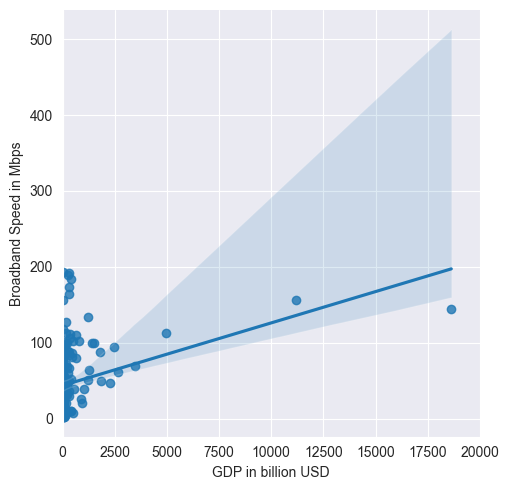

In [260]:
plotBroadBand = sns.lmplot(x="GDP", y="BroadbandSpeed", data=dataset)
plotBroadBand.set_xlabels('GDP in billion USD')
plotBroadBand.set_ylabels('Broadband Speed in Mbps')
plt.xlim(0, 20000)
plotBroadBand.savefig(r'..\output\GDP - Broadband Speed.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# GDP - Mobile Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

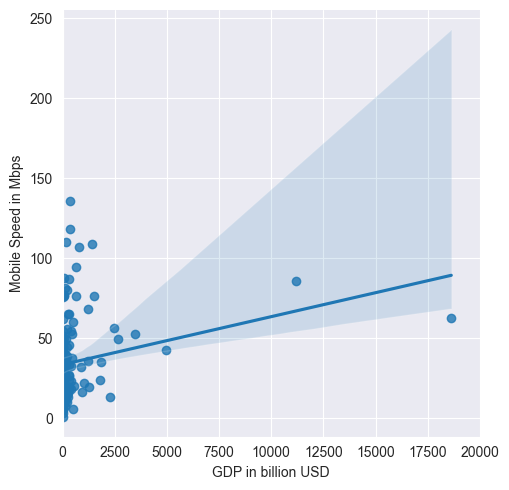

In [261]:
plotBroadBand = sns.lmplot(x="GDP", y="MobileSpeed", data=dataset)
plotBroadBand.set_xlabels('GDP in billion USD')
plotBroadBand.set_ylabels('Mobile Speed in Mbps')
plt.xlim(0, 20000)
plotBroadBand.savefig(r'..\output\GDP - Mobile Speed.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Internet Access - Mobile Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

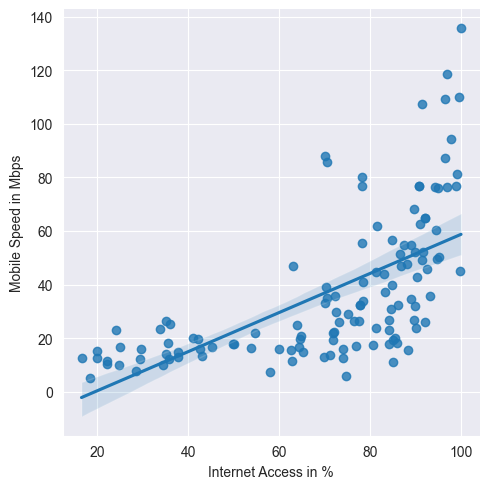

In [262]:
plotBroadBand = sns.lmplot(x="InternetAccess2020", y="MobileSpeed", data=dataset)
plotBroadBand.set_xlabels('Internet Access in %')
plotBroadBand.set_ylabels('Mobile Speed in Mbps')
plotBroadBand.savefig(r'..\output\Internet Access - Mobile Speed.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Internet Access - Broadband Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

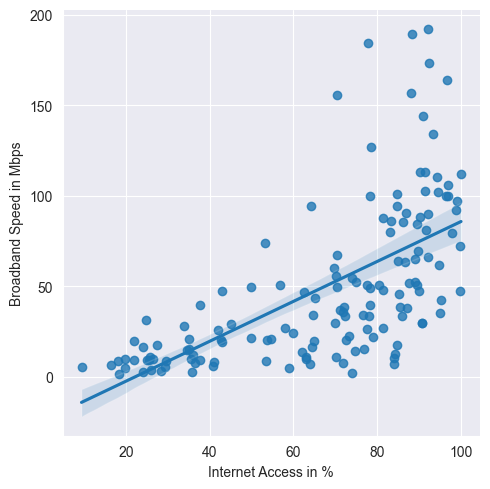

In [263]:
plotBroadBand = sns.lmplot(x="InternetAccess2020", y="BroadbandSpeed", data=dataset)
plotBroadBand.set_xlabels('Internet Access in %')
plotBroadBand.set_ylabels('Broadband Speed in Mbps')
plotBroadBand.savefig(r'..\output\Internet Access - Broadband Speed.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Unemployment - Mobile Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

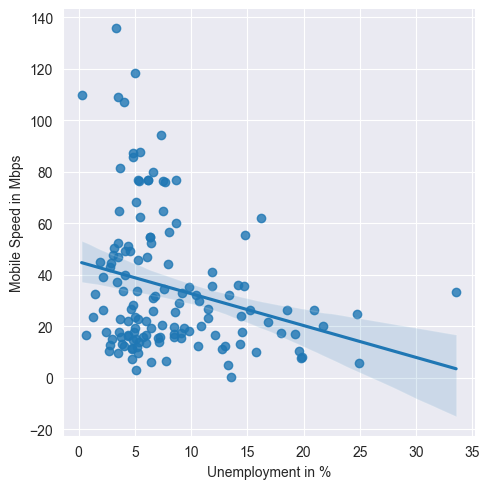

In [264]:
plotBroadBand = sns.lmplot(x="Unemployment2021", y="MobileSpeed", data=dataset)
plotBroadBand.set_xlabels('Unemployment in %')
plotBroadBand.set_ylabels('Mobile Speed in Mbps')
plotBroadBand.savefig(r'..\output\Unemployment - Mobile Speed.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Unemployment - Broadband Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

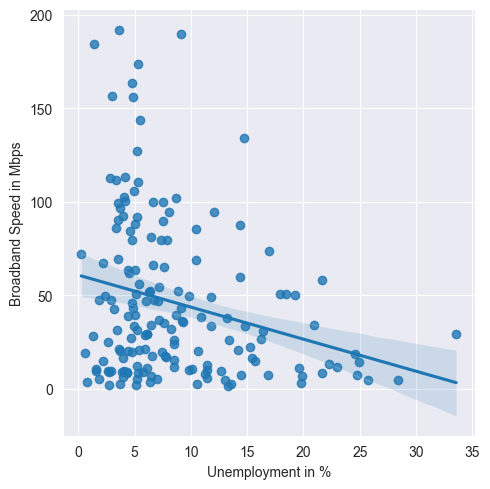

In [265]:
plotBroadBand = sns.lmplot(x="Unemployment2021", y="BroadbandSpeed", data=dataset)
plotBroadBand.set_xlabels('Unemployment in %')
plotBroadBand.set_ylabels('Broadband Speed in Mbps')
plotBroadBand.savefig(r'..\output\Unemployment - Broadband Speed.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Military Spending - Broadband Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

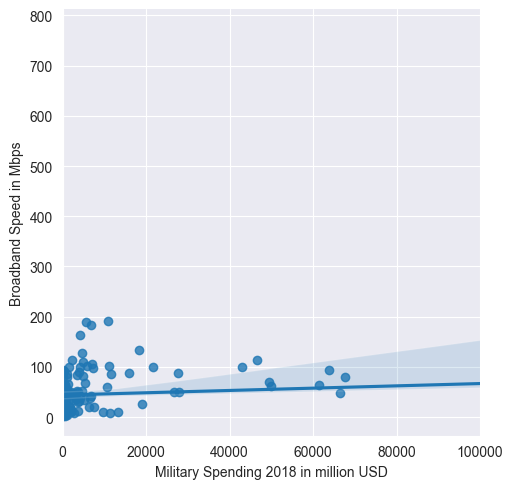

In [266]:
plotBroadBand = sns.lmplot(x="MilitarySpending2018", y="BroadbandSpeed", data=dataset)
plotBroadBand.set_xlabels('Military Spending 2018 in million USD')
plotBroadBand.set_ylabels('Broadband Speed in Mbps')
plt.xlim(0, 100000) #Ohne USA
plotBroadBand.savefig(r'..\output\Military Spending - Broadband Speed.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Military Spending - Mobile Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

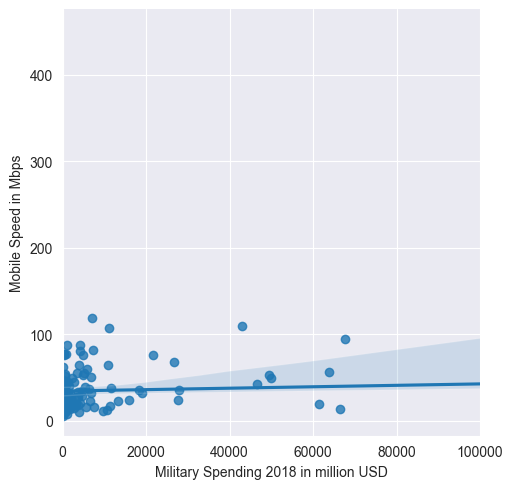

In [267]:
plotBroadBand = sns.lmplot(x="MilitarySpending2018", y="MobileSpeed", data=dataset)
plotBroadBand.set_xlabels('Military Spending 2018 in million USD')
plotBroadBand.set_ylabels('Mobile Speed in Mbps')
plt.xlim(0, 100000) #Ohne USA
plotBroadBand.savefig(r'..\output\Military Spending - Mobile Speed.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Happiness Score - Mobile Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

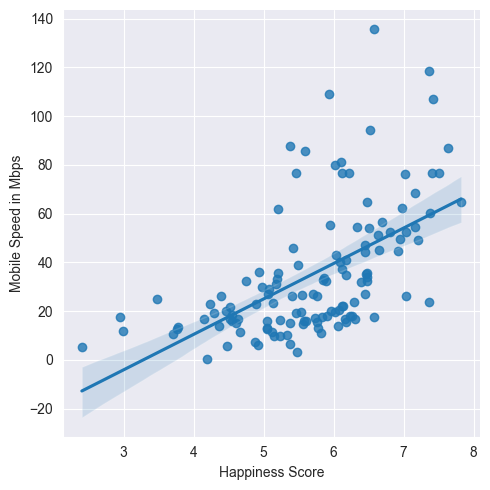

In [268]:
plotBroadBand = sns.lmplot(x="HappinessScore2022", y="MobileSpeed", data=dataset)
plotBroadBand.set_xlabels('Happiness Score')
plotBroadBand.set_ylabels('Mobile Speed in Mbps')
plotBroadBand.savefig(r'..\output\Happiness Score - Mobile Speed.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Happiness Score - Broadband Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

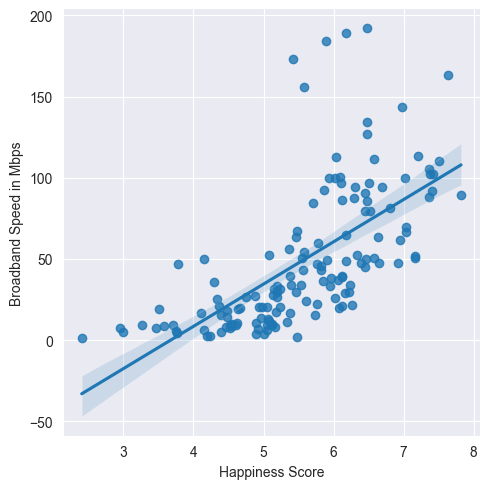

In [269]:
plotBroadBand = sns.lmplot(x="HappinessScore2022", y="BroadbandSpeed", data=dataset)
plotBroadBand.set_xlabels('Happiness Score')
plotBroadBand.set_ylabels('Broadband Speed in Mbps')
plotBroadBand.savefig(r'..\output\Happiness Score - Broadband Speed.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Boxplot GDP (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

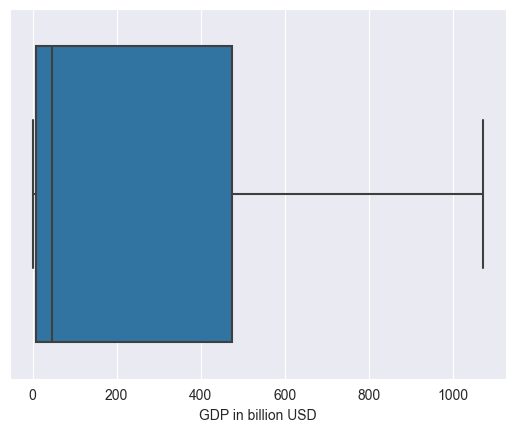

In [270]:
plotBroadBand = sns.boxplot(x=gdp['GDP'], showfliers = False)
#plotBroadBand = sns.swarmplot(x=gdp['GDP'], color="r")
plotBroadBand.set(
    xlabel='GDP in billion USD'
)
plotBroadBand.get_figure().savefig(r'..\output\GDP Boxplot.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Boxplot Mobile Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

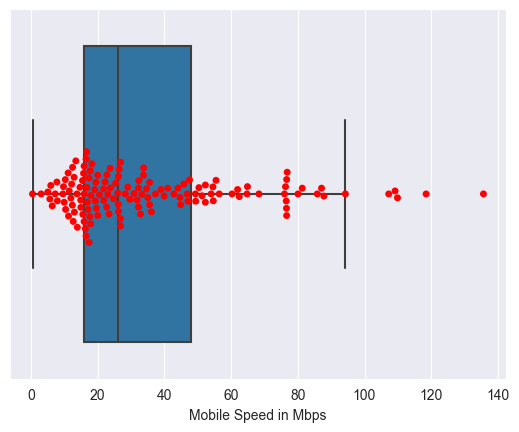

In [271]:
plotBroadBand = sns.boxplot(x=dataset['MobileSpeed'], showfliers= False)
plotBroadBand = sns.swarmplot(x=dataset['MobileSpeed'], color="r")
plotBroadBand.set(
    xlabel='Mobile Speed in Mbps'
)
plotBroadBand.get_figure().savefig(r'..\output\Mobile Speed Boxplot.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Boxplot Broadband Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

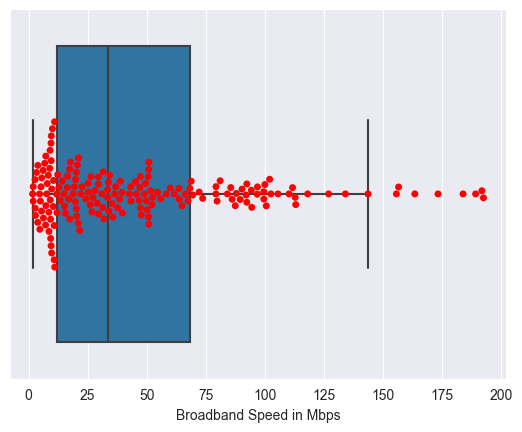

In [272]:
plotBroadBand = sns.boxplot(x=dataset['BroadbandSpeed'], showfliers= False)
plotBroadBand = sns.swarmplot(x=dataset['BroadbandSpeed'], color="r")
plotBroadBand.set(
    xlabel='Broadband Speed in Mbps'
)
plotBroadBand.get_figure().savefig(r'..\output\Broadband Speed Boxplot.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Happiness Score Boxplot (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

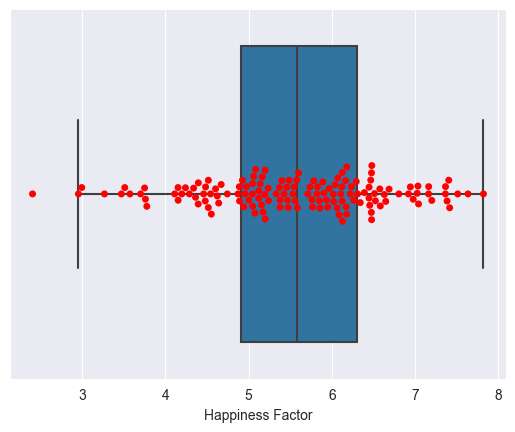

In [273]:
plotBroadBand = sns.boxplot(x=dataset['HappinessScore2022'], showfliers= False)
plotBroadBand = sns.swarmplot(x=dataset['HappinessScore2022'], color="r")
plotBroadBand.set(
    xlabel='Happiness Factor'
)
plotBroadBand.get_figure().savefig(r'..\output\Happiness Boxplot.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Unemployment Boxplot (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

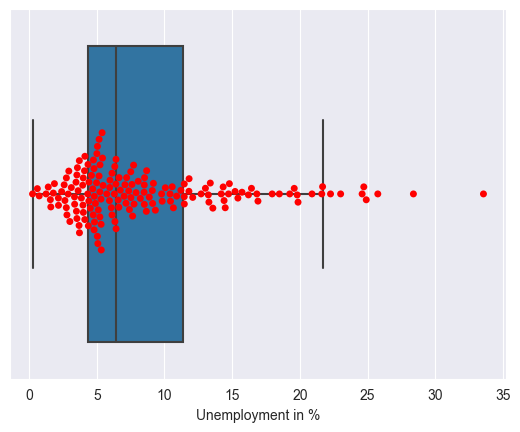

In [274]:
plotBroadBand = sns.boxplot(x=dataset['Unemployment2021'], showfliers= False)
plotBroadBand = sns.swarmplot(x=dataset['Unemployment2021'], color="r")
plotBroadBand.set(
    xlabel='Unemployment in %'
)
plotBroadBand.get_figure().savefig(r'..\output\Unemployment Boxplot.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Internet Access Boxplot (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

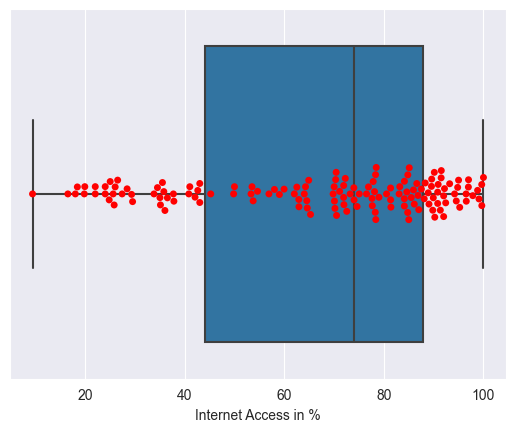

In [275]:
plotBroadBand = sns.boxplot(x=dataset['InternetAccess2020'], showfliers= False)
plotBroadBand = sns.swarmplot(x=dataset['InternetAccess2020'], color="r")
plotBroadBand.set(
    xlabel='Internet Access in %'
)
plotBroadBand.get_figure().savefig(r'..\output\Internet Access Boxplot.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Military Spending Boxplot (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

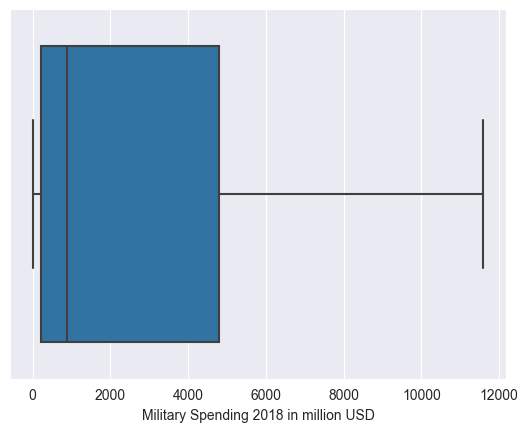

In [276]:
plotBroadBand = sns.boxplot(x=dataset['MilitarySpending2018'], showfliers= False)
#plotBroadBand = sns.swarmplot(x=dataset['MilitarySpending2018'], color="r")
plotBroadBand.set(
    xlabel='Military Spending 2018 in million USD'
)
plotBroadBand.get_figure().savefig(r'..\output\Military Spending Boxplot.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# NaN Percentage (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

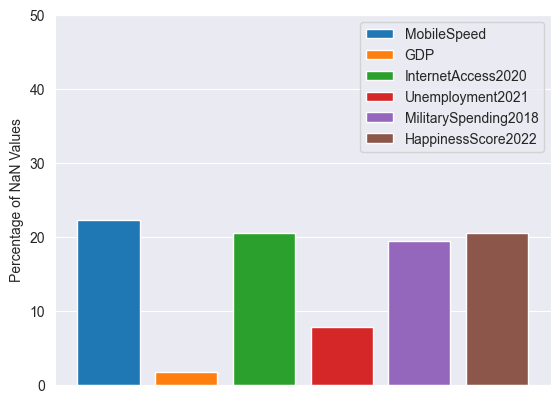

In [277]:
percent = dataset.isna().mean().round(4) * 100
f, ax = plt.subplots()
percent.drop('YearGDP', axis=0, inplace=True)

for i,item in enumerate(zip(percent.keys(),percent.values)):
    if (item[1] > 0):
        ax.bar(item[0], item[1], label = item[0])
        #ax.text(i - 0.25, item[1] + 1.5 , str(np.round(item[1],2)))

ax.set_xticklabels([])
ax.set_xticks([])
plt.ylim(0,50)
plt.ylabel('Percentage of NaN Values')
plt.legend()
plt.savefig(r'..\output\NaN Values.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Pair plot - Mobile Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

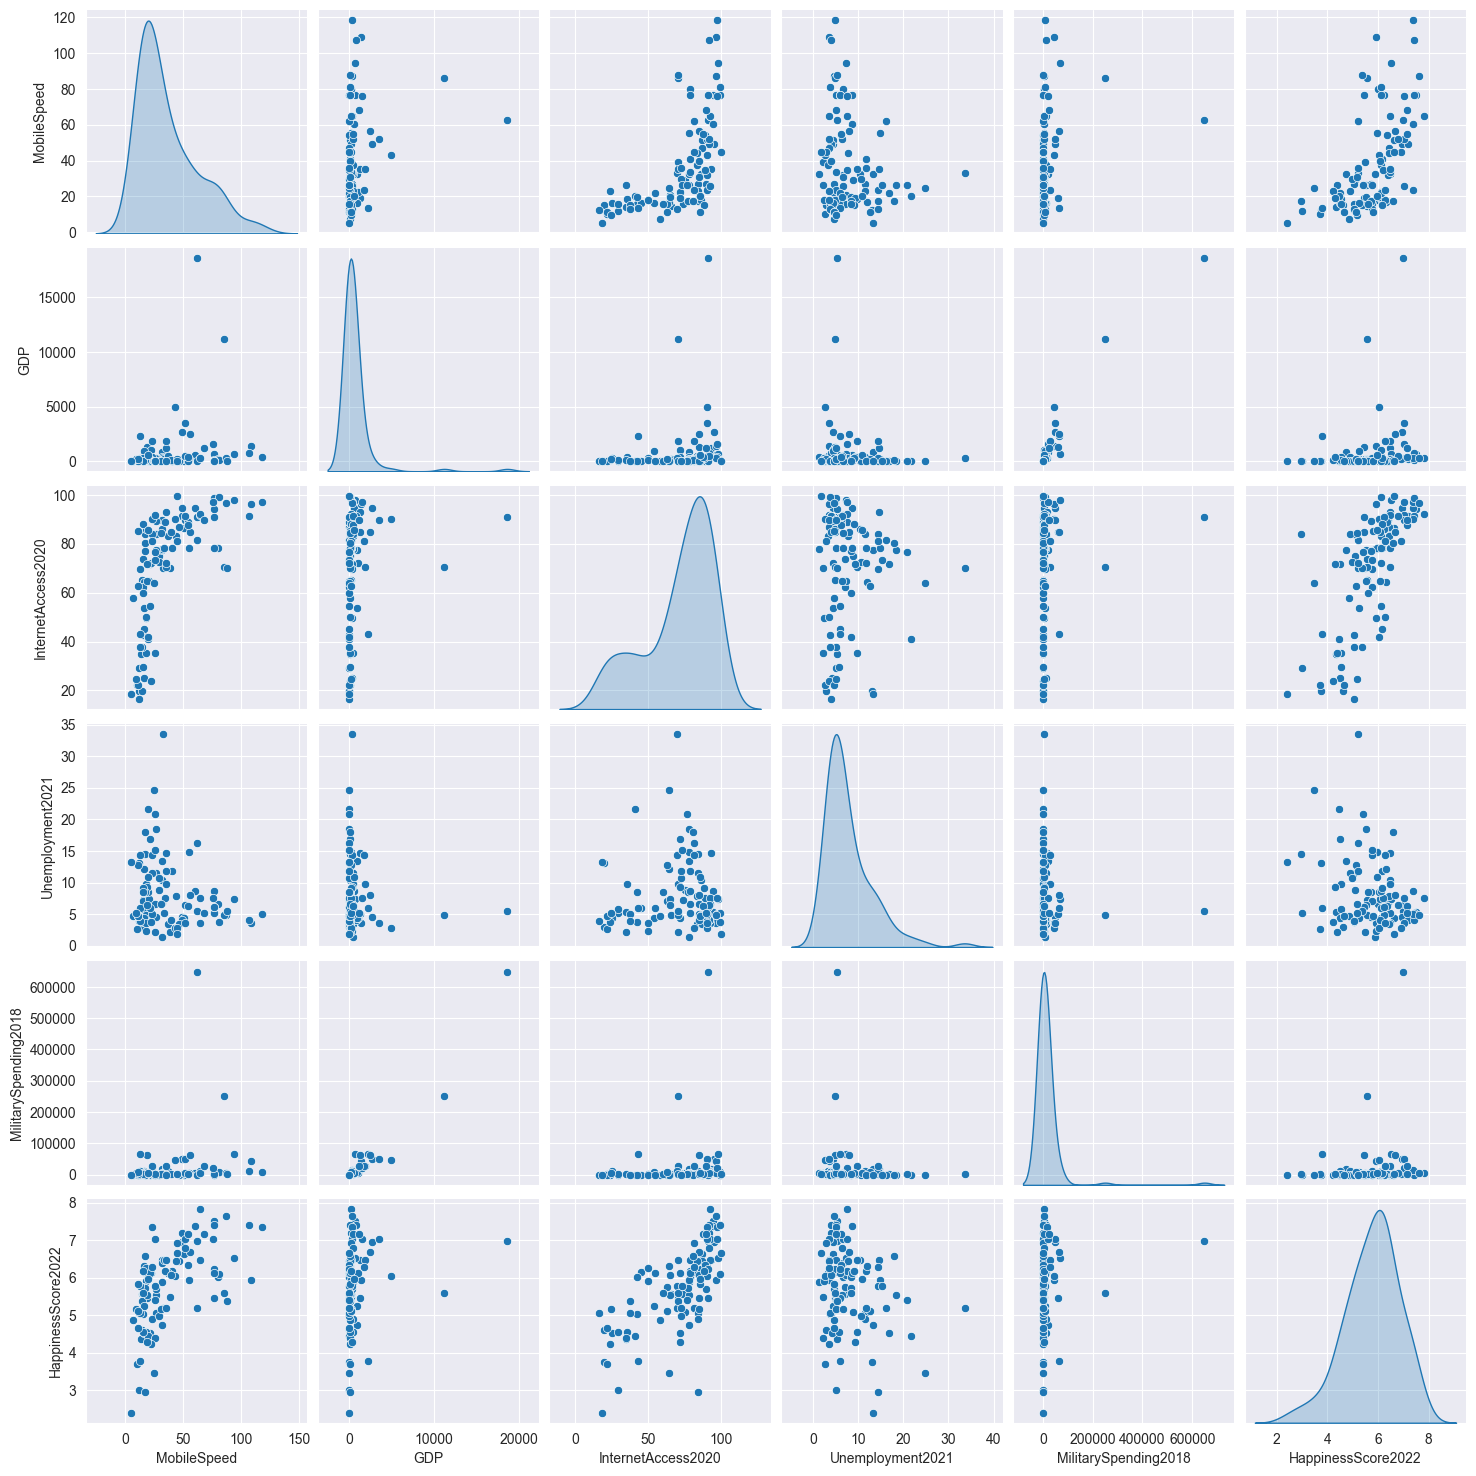

In [278]:
tmpMobile = dataset.drop('CountryCode', axis=1)
tmpMobile.drop('CountryName', axis=1, inplace=True)
tmpMobile.drop('YearGDP', axis=1, inplace=True)
tmpMobile.drop('YearInternetSpeed', axis=1, inplace=True)
tmpMobile.drop('BroadbandSpeed', axis=1, inplace=True)

tmpMobile = tmpMobile.dropna()

plot = sns.pairplot(tmpMobile[['MobileSpeed', 'GDP', 'InternetAccess2020', 'Unemployment2021', 'MilitarySpending2018', 'HappinessScore2022']], diag_kind='kde')
plot.savefig(r'..\output\Mobile Speed - Pair plot.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Pair plot - Broadband Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

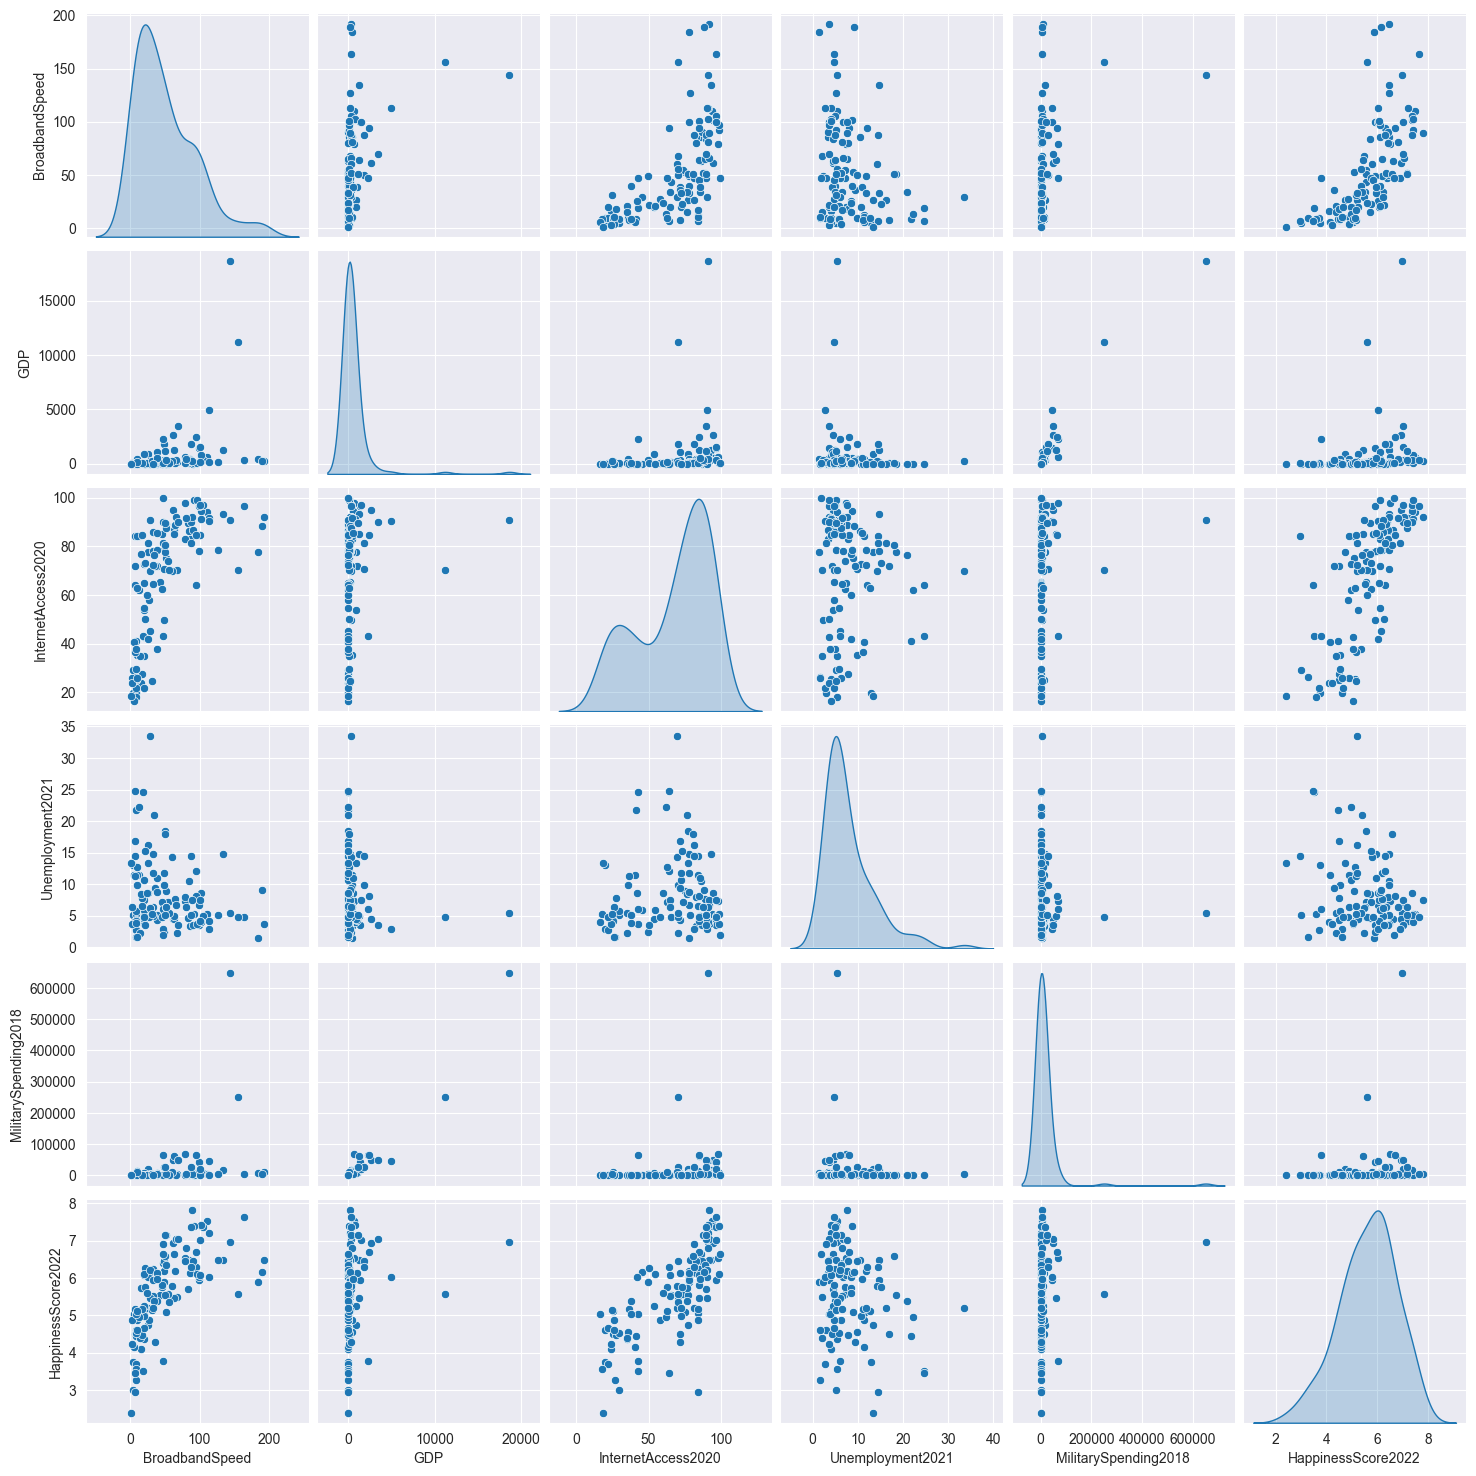

In [279]:
tmpBroadband = dataset.drop('CountryCode', axis=1)
tmpBroadband.drop('CountryName', axis=1, inplace=True)
tmpBroadband.drop('YearGDP', axis=1, inplace=True)
tmpBroadband.drop('YearInternetSpeed', axis=1, inplace=True)
tmpBroadband.drop('MobileSpeed', axis=1, inplace=True)

tmpBroadband = tmpBroadband.dropna()

plot = sns.pairplot(tmpBroadband[['BroadbandSpeed', 'GDP', 'InternetAccess2020', 'Unemployment2021', 'MilitarySpending2018', 'HappinessScore2022']], diag_kind='kde')
plot.savefig(r'..\output\Broadband Speed - Pair plot')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Adjusting tmpMobile (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

In [280]:
average = tmpMobile['MobileSpeed'].mean()
tmpMobile.insert(0, 'OverAverage', np.where(tmpMobile['MobileSpeed'] > average, 1, 0))
tmpMobile.drop('MobileSpeed', axis=1, inplace=True)

# Adjusting tmpBroadband (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

In [281]:
average = tmpBroadband['BroadbandSpeed'].mean()
tmpBroadband.insert(0, 'OverAverage', np.where(tmpBroadband['BroadbandSpeed'] > average, 1, 0))
tmpBroadband.drop('BroadbandSpeed', axis=1, inplace=True)

# Mobile Speed - Deep Learning (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

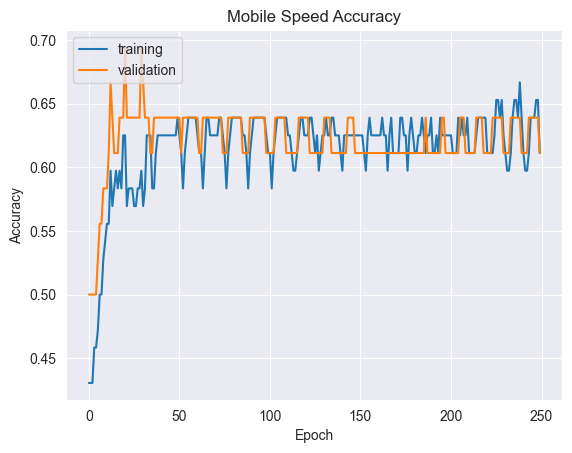

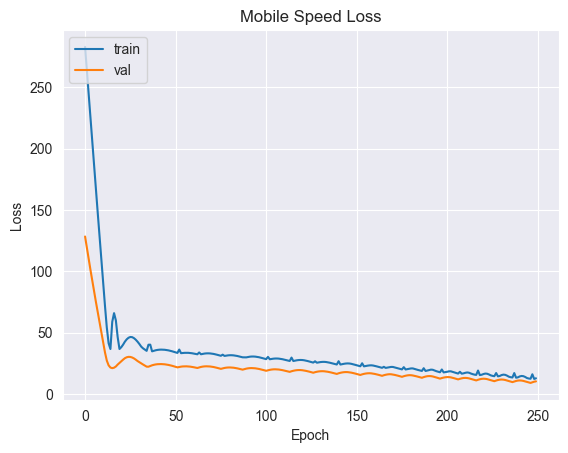

In [282]:
labels=tmpMobile['OverAverage']
features = tmpMobile.iloc[:,1:6]
X=features
y=np.ravel(labels)

opt = keras.optimizers.Adam(learning_rate=0.001)
model_mobile = Sequential()
model_mobile.add(Dense(5, activation='relu', input_shape=(5,)))
model_mobile.add(Dense(3, activation='relu'))
model_mobile.add(Dense(1, activation='sigmoid'))
model_mobile.compile(loss='binary_crossentropy',
optimizer=opt,
metrics=['accuracy'])
training_mobile = model_mobile.fit(X, y,epochs=250, batch_size=128, verbose=0, shuffle=True, validation_split=0.33)


plt.plot(training_mobile.history['accuracy'])
plt.plot(training_mobile.history['val_accuracy'])
plt.title('Mobile Speed Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.savefig(r'..\output\Mobile Speed - Accuracy.png')
plt.show()



plt.plot(training_mobile.history['loss'])
plt.plot(training_mobile.history['val_loss'])
plt.title('Mobile Speed Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(r'..\output\Mobile Speed - Loss.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Mobile Speed - Over Average (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

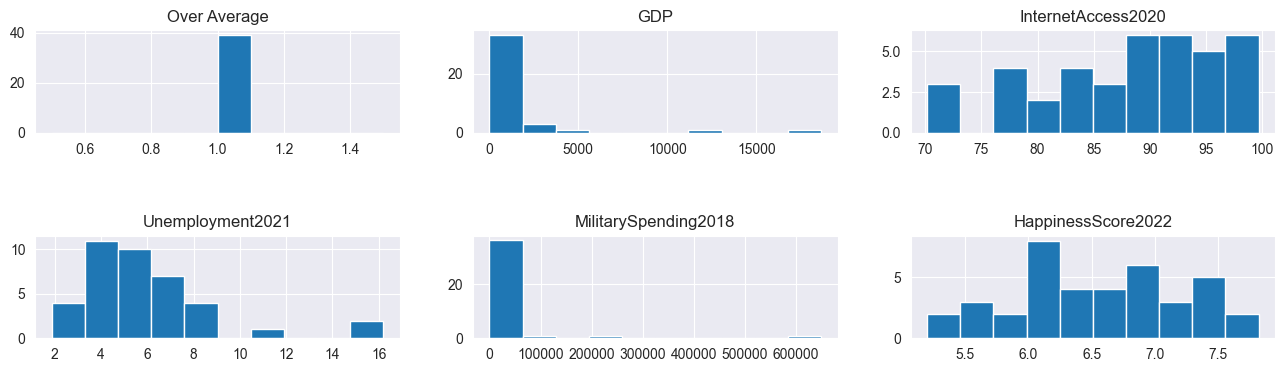

In [283]:
df = pd.DataFrame(tmpMobile, columns= np.array(tmpMobile.columns))
overAverage = df.loc[(df.OverAverage == 1)]
fig, ax = plt.subplots(2,3,figsize=(16, 4) )
i = 0
j = 0
for c in overAverage.columns[0:]:
    ax[j,i].hist(overAverage[c])
    ax[j,i].set_title(c)
    i = i + 1
    if i == 3:
        j = 1
        i = 0
ax[0,0].set_title("Over Average")
fig.subplots_adjust(hspace=1, wspace=0.2)


plt.savefig(r'..\output\Mobile Speed - Over Average.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Mobile Speeds - Under Average (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

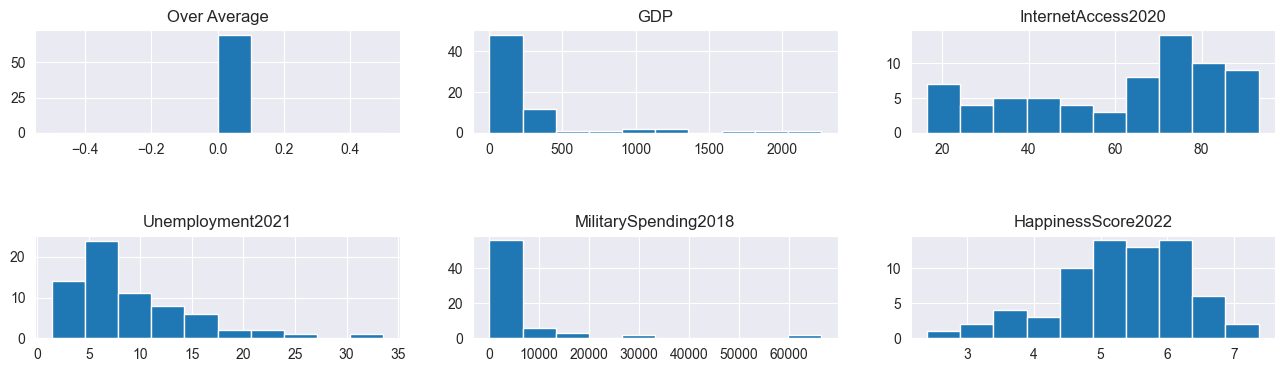

In [284]:
df = pd.DataFrame(tmpMobile, columns= np.array(tmpMobile.columns))
overAverage = df.loc[(df.OverAverage == 0)]
fig, ax = plt.subplots(2,3,figsize=(16, 4) )
i = 0
j = 0
for c in overAverage.columns[0:]:
    ax[j,i].hist(overAverage[c])
    ax[j,i].set_title(c)
    i = i + 1
    if i == 3:
        j = 1
        i = 0
ax[0,0].set_title("Over Average")
fig.subplots_adjust(hspace=1, wspace=0.2)


plt.savefig(r'..\output\Mobile Speed - Under Average.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Vergleich Mobile Speed Over Average / Under Average

# Mobile Speed - Neural Network Visualization (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

Hier wird die Funktion vom Anfang aufgerufen, um das erstellte neuronale Netzwerk Grafisch darzustellen, für genauere Informationen wie dies geschieht /LinkZurFunktion/

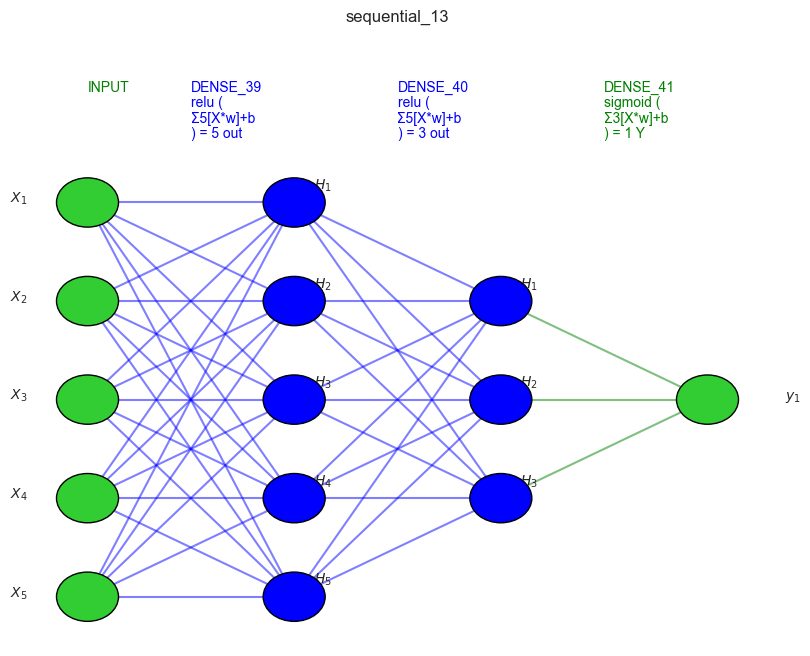

In [285]:
visualize_nn(model_mobile, 'Mobile Speed - Neural Network', description=True, figsize=(10,8))

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Broadband Speed - Deep Learning (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

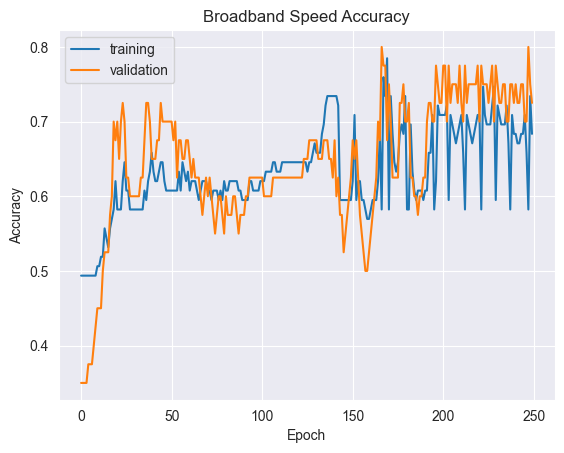

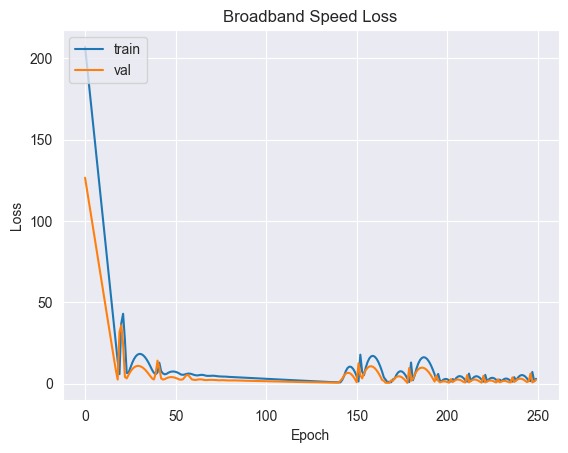

In [292]:
labels=tmpBroadband['OverAverage']
features = tmpBroadband.iloc[:,1:6]
X=features
y=np.ravel(labels)

opt = keras.optimizers.Adam(learning_rate=0.001)
model_broadband = Sequential()
model_broadband.add(Dense(5, activation='relu', input_shape=(5,)))
model_broadband.add(Dense(3, activation='relu'))
model_broadband.add(Dense(1, activation='sigmoid'))
model_broadband.compile(loss='binary_crossentropy',
optimizer=opt,
metrics=['accuracy'])
training_broadband = model_broadband.fit(X, y,epochs=250, batch_size=128, verbose=0, shuffle=True, validation_split=0.33)


plt.plot(training_broadband.history['accuracy'])
plt.plot(training_broadband.history['val_accuracy'])
plt.title('Broadband Speed Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.savefig(r'..\output\Broadband Speed - Accuracy.png')
plt.show()



plt.plot(training_broadband.history['loss'])
plt.plot(training_broadband.history['val_loss'])
plt.title('Broadband Speed Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(r'..\output\Broadband Speed - Loss.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Broadband Speed - Over Average (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

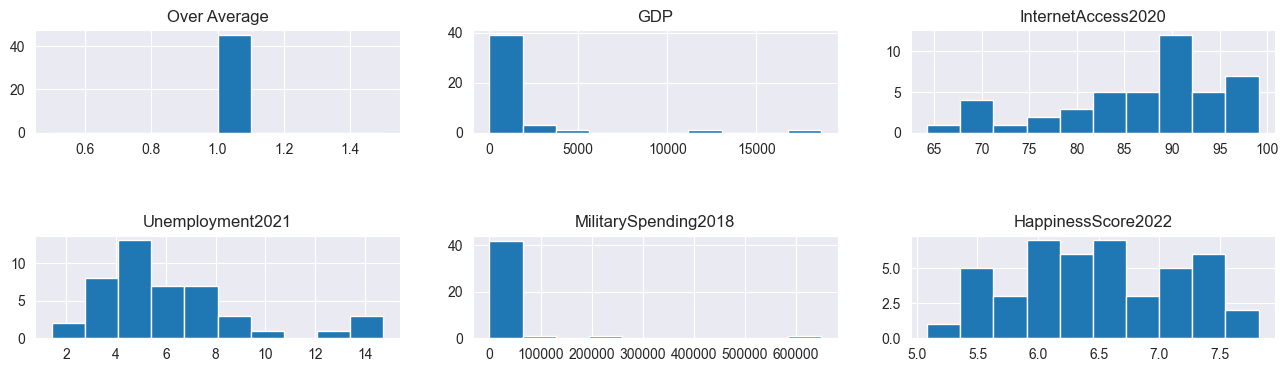

In [287]:
df = pd.DataFrame(tmpBroadband, columns= np.array(tmpBroadband.columns))
overAverage = df.loc[(df.OverAverage == 1)]
fig, ax = plt.subplots(2,3,figsize=(16, 4) )
i = 0
j = 0
for c in overAverage.columns[0:]:
    ax[j,i].hist(overAverage[c])
    ax[j,i].set_title(c)
    i = i + 1
    if i == 3:
        j = 1
        i = 0
ax[0,0].set_title("Over Average")
fig.subplots_adjust(hspace=1, wspace=0.2)


plt.savefig(r'..\output\Broadband Speed - Over Average.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Broadband Speed - Under Average (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)

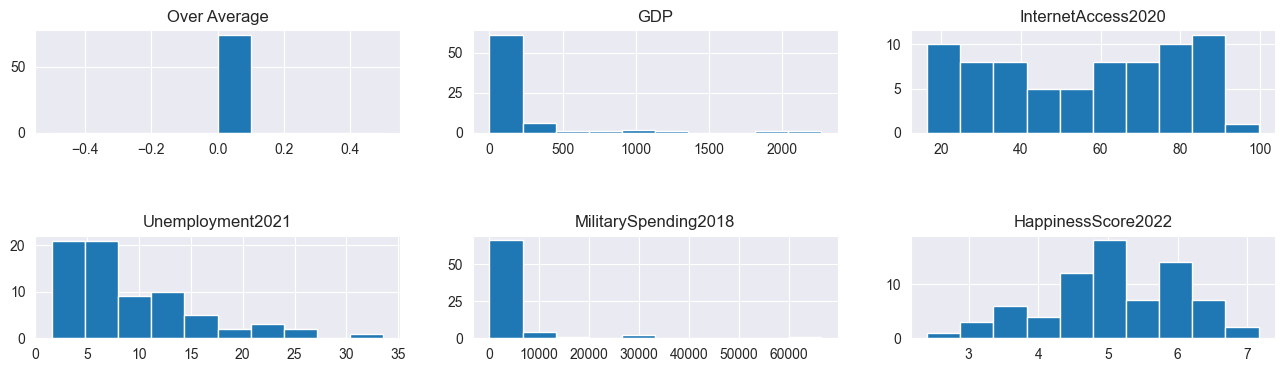

In [288]:
df = pd.DataFrame(tmpBroadband, columns= np.array(tmpBroadband.columns))
overAverage = df.loc[(df.OverAverage == 0)]
fig, ax = plt.subplots(2,3,figsize=(16, 4) )
i = 0
j = 0
for c in overAverage.columns[0:]:
    ax[j,i].hist(overAverage[c])
    ax[j,i].set_title(c)
    i = i + 1
    if i == 3:
        j = 1
        i = 0
ax[0,0].set_title("Over Average")
fig.subplots_adjust(hspace=1, wspace=0.2)


plt.savefig(r'..\output\Broadband Speed - Under Average.png')
plt.show()

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Vergleich Broadband Speed Over Average / Under Average

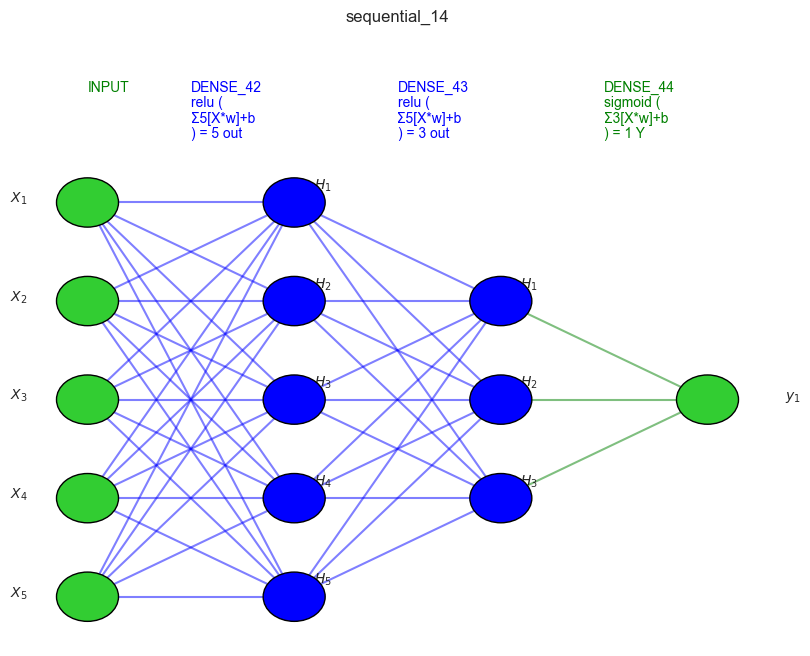

In [289]:
visualize_nn(model_broadband, 'Broadband Speed - Neural Network', description=True, figsize=(10,8))

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Welt - Broadband Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)
Kann nicht in output Ordner gespeichert werden

In [290]:
internet_speed_country = dataset
internet_speed_country.reset_index()

world_broadband = px.choropleth(
    internet_speed_country,                 #Das Datenset das verwendet wird
    locations='CountryCode',                #Länder werden über die Spalte CountryCode zugeordnet
    locationmode='ISO-3',                   #Länder werden mit 3 Digit CountryCodes zugeordnet
    color='BroadbandSpeed',                 #Die Farben werden nach dem BroadbandSpeed vergeben
    color_continuous_scale= 'temps_r',      #Die Farbscala temps wird reversed verwendet
    hover_name='CountryName',               #Beim Hovern soll der Name des Landes angezeigt werden
    title = 'Boradband Speed - Worldwide')  #Die Überschrift der Karte

world_broadband.update_geos(projection_type="orthographic",
                        showocean=True,
                        showlakes=True,
                        showcountries=True,
                        lataxis_showgrid=True,
                        lonaxis_showgrid=True) #Weitere Einstellungen für die Karte

world_broadband.update_layout(height=800, margin={"r":0,"t":80,"l":0,"b":50}) #Anpassen des Layouts

world_broadband.show()  #Anzeige der Welt

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

# Welt - Mobile Speed (Folgenden Codeblock beschreiben und zur gliederung hinzufügen)
Kann nicht in output Ordner gespeichert werden

In [291]:
internet_speed_country = dataset
internet_speed_country.reset_index()

world_mobile = px.choropleth(
    internet_speed_country,                 #Das Datenset das verwendet wird
    locations='CountryCode',                #Länder werden über die Spalte CountryCode zugeordnet
    locationmode='ISO-3',                   #Länder werden mit 3 Digit CountryCodes zugeordnet
    color='MobileSpeed',                 #Die Farben werden nach dem BroadbandSpeed vergeben
    color_continuous_scale= 'temps_r',      #Die Farbscala temps wird reversed verwendet
    hover_name='CountryName',               #Beim Hovern soll der Name des Landes angezeigt werden
    title = 'Mobile Speed - Worldwide')  #Die Überschrift der Karte

world_mobile.update_geos(projection_type="orthographic",
                        showocean=True,
                        showlakes=True,
                        showcountries=True,
                        lataxis_showgrid=True,
                        lonaxis_showgrid=True) #Weitere Einstellungen für die Karte

world_mobile.update_layout(height=800, margin={"r":0,"t":80,"l":0,"b":50}) #Anpassen des Layouts

world_mobile.show()  #Anzeige der Welt

# (Grafik darüber beschreiben und als Unterpunkt der Gliederung hinzufügen)

<a id='quellen'></a>
# Quellen: (Zur Gliederung hinzufügen)

#### Internet Speeds:
https://www.kaggle.com/datasets/prasertk/internet-broadband-and-mobile-speeds-by-country
#### Unemployment:
https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?end=2021&name_desc=false&start=1991&view=chart
#### Military Spending:
https://www.kaggle.com/datasets/nitinsss/military-expenditure-of-countries-19602019
#### Internet Access:
https://data.worldbank.org/indicator/IT.NET.USER.ZS
#### GDP:
https://www.kaggle.com/datasets/tunguz/country-regional-and-world-gdp
#### World Happiness Report:
https://www.kaggle.com/datasets/mathurinache/world-happiness-report